# Polynomial fit with iminuit

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
import random

In [2]:
# Vector of noise
randoms = np.zeros(100)
for i in range(len(randoms)):
    randoms[i] = random.random()

In [3]:
# x is input data, y is noisy real output data
x = np.linspace(0, 3, 100)
# Make sure x and y are same length!
y = (2*x**2 - 7*x  + 5) + randoms

In [4]:
# Define form of polynomial fit
def model_func(x, a, b, c):
    return a*x**2 + b*x + c

# Define least squares function to be minimised
def LSQ(a, b, c):
    # sum of square differences between true values and model predictions
    return np.sum((y - model_func(x, a, b, c)) ** 2)

In [5]:
# Make minuit object given initial guesses at fit parameters a, b, c
fit = Minuit(LSQ, a=1, b=-3, c=10)
# Define uncertainty on parameter estimates by where LSQ increases from minimum by 1.0
fit.errordef = 1.
# Actually carry out the fit, results are 'Value' column of printout
fit.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7.187                      │              Nfcn = 54               │
│ EDM = 1.08e-17 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   2.00    │   0.15    │            │            │         │         │       │
│ 1 │ b    │   -7.0    │    0.5    │            │            │         │         │       │
│ 2 │ c    │   5.47    │   0.29    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────┐
│   │       a       b       c │
├───┼─────────────────────────┤
│ a │  0.0214 -0.0641  0.0317 │
│ b │ -0.0641   0.205  -0.115 │
│ c │  0.0317  -0.115  0.0865 │
└───┴─────────────────────────┘

In [6]:
# Store best fit estimates for a, b, c
a_fit = fit.values["a"]
b_fit = fit.values["b"]
c_fit = fit.values["c"]

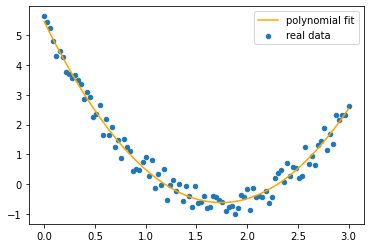

In [12]:
# plot 
plt.scatter(x, y, s=20, label= 'real data')
plt.plot(x, model_func(x, a_fit, b_fit, c_fit), label='polynomial fit', color='orange')
plt.legend()
plt.show()